# Implement Eigen face recognition from scratch.

## Importing Libs

In [47]:
# importing reqired libs
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os

## Downloading the image from the internet

In [48]:
# download the image
if not os.path.exists("msd2.jpg"):
    !wget "https://www.themoviedb.org/t/p/w600_and_h900_bestv2/tJMTQ1CZ447TkVmS9BsnIkGcOm5.jpg" -O "msd.jpg"
    !wget "https://s.ndtvimg.com//images/entities/120/ms-dhoni-700.png" -O "data/face-lfw-train/msd2.jpg"

## Read the image from the data folder

In [49]:
# loading face data
from pathlib import Path
src = Path("data/face-lfw-train")
images = []
labels = []
for img_path in src.glob("*.jpg"):
    labels.append(img_path.stem)
    img = cv.imread(str(img_path), cv.IMREAD_GRAYSCALE)
    img = cv.resize(img, (250, 250))
    images.append(img)

In [70]:
images[1].shape,labels[1]

((62500,), 'Eric_Snow_0001')

## Plotting the images

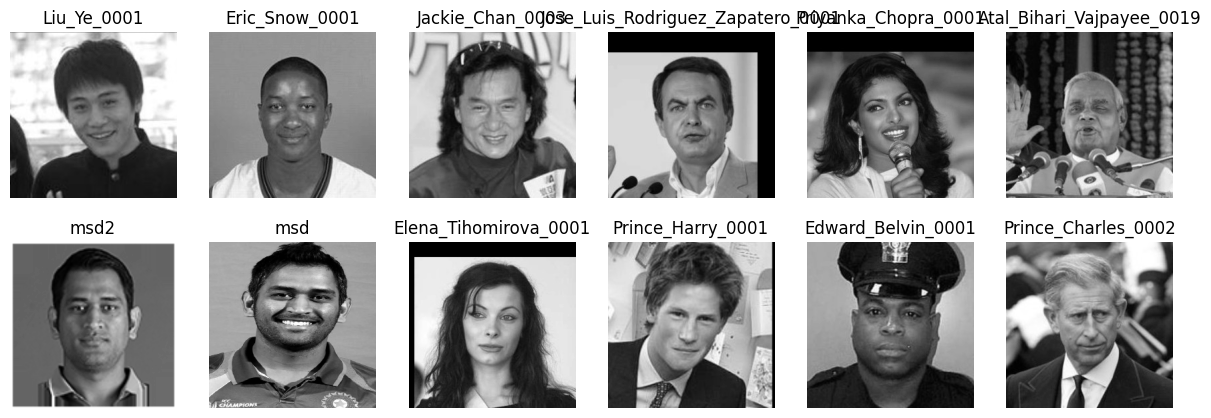

In [51]:
# plotting the image
plt.figure(figsize=(15,5))
r,c = 2,6
for i in range(len(images)):
    plt.subplot(r,c,i+1)
    # print(images[i].shape)
    plt.title(labels[i])
    plt.imshow(images[i],cmap="gray")
    plt.axis("off")
plt.show()

## combining all images into one vector

In [52]:
# combining and flatten the all images
images = np.array(images)
images = images.reshape(-1, 250*250)
print(f"shape of images: {images.shape}")

shape of images: (12, 62500)


## Mean Image

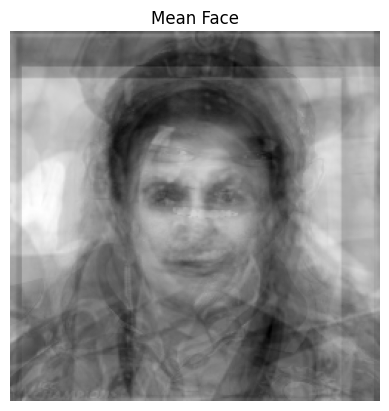

In [53]:
# calculating the mean of all images
mean = np.mean(images, axis=0)
plt.imshow(mean.reshape(250,250), cmap="gray")
plt.title("Mean Face")
plt.axis("off")
plt.show()

## Normalizing the images

In [54]:
# normalizing the images
normalised_images = np.array([np.array(img).flatten() - mean for img in images])
normalised_images.shape

(12, 62500)

## Plotting Normalized Images

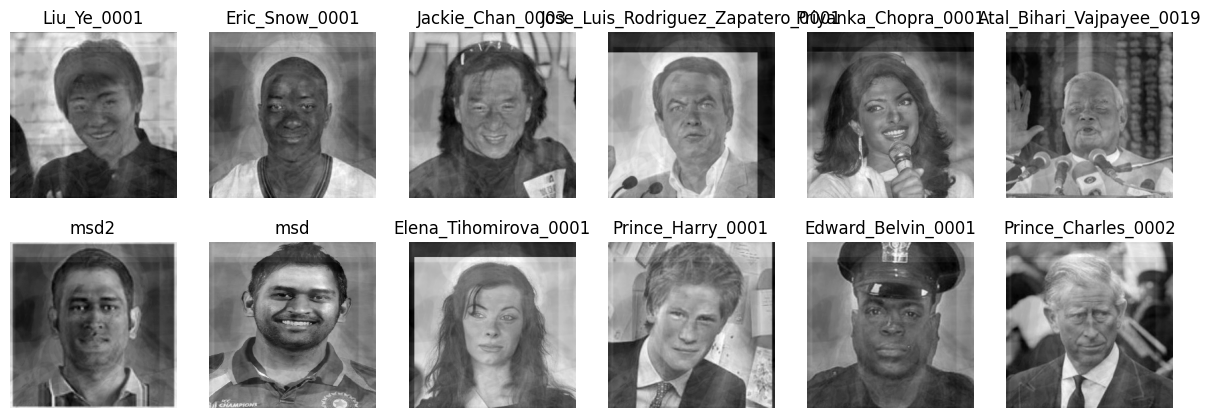

In [55]:
# plotting the noralized images
plt.figure(figsize=(15,5))
r,c = 2,6
for i in range(len(normalised_images)):
    plt.subplot(r,c,i+1)
    # print(images[i].shape)
    plt.title(labels[i])
    plt.imshow(normalised_images[i].reshape(250,250),cmap="gray")
    plt.axis("off")
plt.show()

## calculating the covariance matrix (PCA)

In [56]:
# calculating the eigen values and eigen vectors
covariance = np.cov(normalised_images)
covariance = np.divide(covariance, len(images))
print(f"covariance shape: {covariance.shape}")
print("convariance matrix: ", covariance)

eigen_values, eigen_vectors = np.linalg.eig(covariance)
print(f"eigne_values shape: {eigen_values.shape}")
print(f"eigen_vectors shape: {eigen_vectors.shape}")
print("eigne_values: ", eigen_values)
print("eigen_vectors: ", eigen_vectors)

covariance shape: (12, 12)
convariance matrix:  [[ 5.05495986e+02 -5.29686670e+01  1.01949190e+02 -1.19816337e+02
  -2.40950351e+02 -2.60327176e+02 -7.76827968e+01 -1.12815831e+01
  -1.00186758e+01  7.85033838e+01  9.23021229e+01 -5.20509623e+00]
 [-5.29686670e+01  1.86292634e+02 -1.10240658e+01 -5.87219149e+00
   8.84386575e+00  4.47948782e+01  3.69464235e+01 -3.46086199e+00
  -9.24008750e+01 -1.24206893e+01 -4.86995522e+01 -5.00308989e+01]
 [ 1.01949190e+02 -1.10240658e+01  2.76201260e+02 -1.54949454e+02
  -9.10917929e+01 -6.14586564e+01 -3.00420231e-01  4.53704566e+00
  -1.37186539e+01  1.23289684e+01  1.32198998e+01 -7.56933202e+01]
 [-1.19816337e+02 -5.87219149e+00 -1.54949454e+02  4.57262710e+02
   4.41657719e+01 -5.05283057e+00 -4.98503798e+01 -5.07830734e+01
  -7.46046323e+00 -6.57580747e+01 -2.76317796e+01 -1.42538980e+01]
 [-2.40950351e+02  8.84386575e+00 -9.10917929e+01  4.41657719e+01
   3.08693692e+02  1.51401335e+02  1.08560230e+01 -2.07928911e+01
   3.03114666e+01 -7.029

In [57]:
eig_pairs = [(eigen_values[index], eigen_vectors[:,index]) for index in range(len(eigen_values))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigen_values))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigen_values))]

## Selecting the top K eigen vectors

In [58]:
K = 6
reduced_data = np.array(eigvectors_sort[:K]).transpose()

In [59]:
proj_data = np.dot(np.array(images).T,reduced_data)
proj_data = proj_data.transpose()

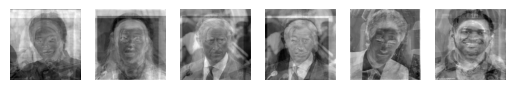

In [60]:
r,c = 2,K
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(250,250)
    plt.subplot(r,c,1+i)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
plt.show()

In [61]:
# finding the weights
w = np.array([np.dot(proj_data,i) for i in normalised_images])
w

array([[ 5.15819400e+08, -1.86595359e+07,  2.38346405e+07,
        -4.80512761e+07,  1.07561588e+07, -4.40357286e+07],
       [-2.93206405e+07,  1.04418400e+08,  1.64664902e+07,
        -5.13399157e+07, -1.60925556e+07, -8.30160033e+07],
       [ 2.18876319e+08,  1.07865182e+08, -9.92544044e+07,
         3.31622904e+07,  2.77527126e+07, -8.39483043e+07],
       [-1.97878014e+08, -2.06929016e+08,  1.22314502e+08,
        -2.13926428e+08,  2.27495805e+07, -3.13105141e+07],
       [-3.75115316e+08, -1.79411433e+07, -9.69467683e+07,
         2.96122406e+07, -4.01516817e+06,  7.71090674e+07],
       [-3.78847337e+08,  9.82121974e+07, -6.09929945e+07,
         5.58870941e+07, -1.12095822e+07, -1.17026831e+07],
       [-1.00430112e+08,  1.58391965e+08,  1.79212491e+07,
        -1.79753324e+06,  7.22501069e+07,  2.40319835e+06],
       [ 3.45051473e+07,  9.62542065e+07,  3.19308325e+07,
        -6.34606158e+06,  4.98564247e+07,  9.61959161e+07],
       [ 2.33987924e+07, -2.82138348e+08, -1.789

## Testing the model

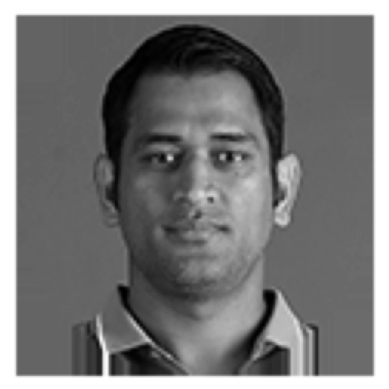

In [62]:
# reading test image
test_img = cv.imread("msd2.jpg", cv.IMREAD_GRAYSCALE)
test_img = cv.resize(test_img, (250,250))
plt.imshow(test_img, cmap="gray")
plt.axis("off")
plt.show()

(250, 250) (62500,)


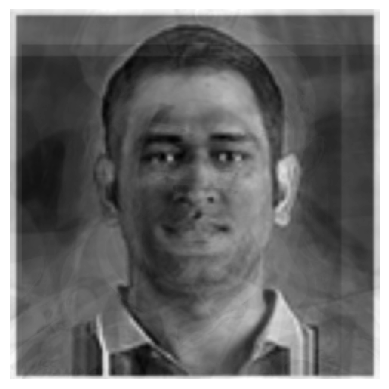

In [63]:
# normalizing the test image
print(test_img.shape,mean.shape)
test_img = test_img - mean.reshape(250,250)

plt.imshow(test_img, cmap="gray")
plt.axis("off")
plt.show()

In [64]:
w_unknown = np.dot(proj_data, test_img.flatten())
w_unknown

array([-1.00430112e+08,  1.58391965e+08,  1.79212491e+07, -1.79753324e+06,
        7.22501069e+07,  2.40319835e+06])

In [65]:
# matching the test image with the training images
for i in range(len(w)):
    print(f"distance between {labels[i]} and unknown: {np.linalg.norm(w[i] - w_unknown)}")
# NOTE:- THE LOWER THE DISTANCE THE MORE SIMILAR THE IMAGES ARE

distance between Liu_Ye_0001 and unknown: 647474440.9646686
distance between Eric_Snow_0001 and unknown: 159772127.22479048
distance between Jackie_Chan_0003 and unknown: 359024338.0915352
distance between Jose_Luis_Rodriguez_Zapatero_0001 and unknown: 449932270.9775375
distance between Priyanka_Chopra_0001 and unknown: 363488543.33091617
distance between Atal_Bihari_Vajpayee_0019 and unknown: 312821395.33617574
distance between msd2 and unknown: 0.0
distance between msd and unknown: 177719255.03471318
distance between Elena_Tihomirova_0001 and unknown: 518008318.7754563
distance between Prince_Harry_0001 and unknown: 413434262.2109754
distance between Edward_Belvin_0001 and unknown: 293150920.81556374
distance between Prince_Charles_0002 and unknown: 423085166.3757774


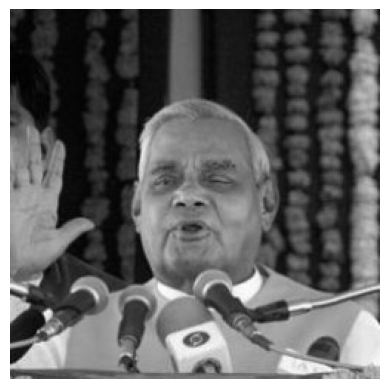

In [66]:
# testing with one of the training image
test_img = cv.imread("data/face-lfw-train/Atal_Bihari_Vajpayee_0019.jpg", cv.IMREAD_GRAYSCALE)
test_img = cv.resize(test_img, (250,250))
plt.imshow(test_img, cmap="gray")
plt.axis("off")
plt.show()

(250, 250) (62500,)


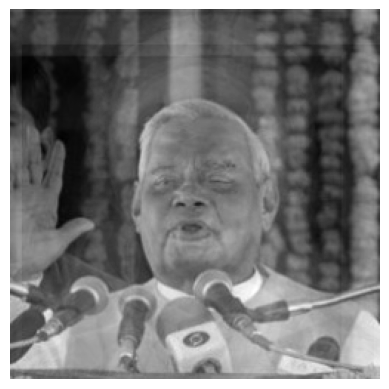

In [67]:
# normalizing the test image
print(test_img.shape,mean.shape)
test_img = test_img - mean.reshape(250,250)

plt.imshow(test_img, cmap="gray")
plt.axis("off")
plt.show()

In [68]:
w_unknown = np.dot(proj_data, test_img.flatten())
w_unknown

array([-3.78847337e+08,  9.82121974e+07, -6.09929945e+07,  5.58870941e+07,
       -1.12095822e+07, -1.17026831e+07])

In [69]:
# matching the test image with the training images
for i in range(len(w)):
    print(f"distance between {labels[i]} and unknown: {np.linalg.norm(w[i] - w_unknown)}")
# NOTE:- THE LOWER THE DISTANCE THE MORE SIMILAR THE IMAGES ARE

distance between Liu_Ye_0001 and unknown: 913024865.4679564
distance between Eric_Snow_0001 and unknown: 380544957.8255404
distance between Jackie_Chan_0003 and unknown: 605049246.6176493
distance between Jose_Luis_Rodriguez_Zapatero_0001 and unknown: 483528409.39355415
distance between Priyanka_Chopra_0001 and unknown: 153061604.98476306
distance between Atal_Bihari_Vajpayee_0019 and unknown: 0.0
distance between msd2 and unknown: 312821395.33617574
distance between msd and unknown: 445806099.2557601
distance between Elena_Tihomirova_0001 and unknown: 570151823.1384891
distance between Prince_Harry_0001 and unknown: 608986777.8452001
distance between Edward_Belvin_0001 and unknown: 507715151.6315304
distance between Prince_Charles_0002 and unknown: 569586779.1746407
